## Librerías

In [1]:
# Básicas
import pandas as pd
import numpy as np

In [2]:
# Gráficos
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Sklearn ML
from sklearn import datasets
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from itertools import combinations
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize


In [4]:
# Sklearn métricas
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report

In [5]:
# Estadísticas
from scipy.stats import f_oneway
from scipy import stats
import statsmodels.api as sm

## Ingesta de datos

In [6]:
# Carga del dataset
dfCangre = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vR42Z5BNxHUNED18y3hyppc9T5g-X1oDi9I6b2X8HRy3eB-jpXo7a3XIVWdwWOyEeodwXM5c0YPUYCQ/pub?output=csv')

## Análisis exploratorio de datos

### Primeras aproxaciones

In [7]:
dfCangre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Sex             3893 non-null   object
 1   Length          3893 non-null   object
 2   Diameter        3893 non-null   object
 3   Height          3893 non-null   object
 4   Weight          3893 non-null   object
 5   Shucked Weight  3893 non-null   object
 6   Viscera Weight  3893 non-null   object
 7   Shell Weight    3893 non-null   object
 8   Age             3893 non-null   int64 
dtypes: int64(1), object(8)
memory usage: 273.9+ KB


In [8]:
# Primeras filas
dfCangre.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,"1,4375","1,175","0,4125","24,6357155","12,3320325","5,5848515","6,747181",9
1,M,"0,8875","0,65","0,2125","5,40057975","2,2963095","1,37495075","1,5592225",6
2,I,"1,0375","0,775","0,25","7,95203475","3,231843","1,60174675","2,76407625",6
3,F,"1,175","0,8875","0,25","13,48018725","4,74854125","2,28213475","5,2446575",10
4,I,"0,8875","0,6625","0,2125","6,90310325","3,458639","1,48834875","1,70097",6


In [9]:
# Últimas filas
dfCangre.tail()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
3888,F,"1,4625","1,1375","0,325","24,81998725","11,6516445","5,85417175","6,3786375",8
3889,F,"1,55","1,2125","0,4375","34,45881725","15,4504775","7,1724235","9,7805775",10
3890,I,"0,625","0,4625","0,1625","2,0128145","0,7654365","0,52446575","0,63786375",5
3891,I,"1,0625","0,775","0,2625","10,3475675","4,5075705","2,33883375","2,9766975",6
3892,I,"0,7875","0,6125","0,2125","4,06815325","1,5025235","1,34660125","1,417475",8


Valores nulos

In [10]:
dfCangre.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

Valores duplicados

In [11]:
# Verifica si hay filas duplicadas
dfCangre.duplicated().sum()

0

In [19]:
dfCangre.describe()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000
mean,1.002055,39.968593,31.116827,10.648916,0.668120,0.289373,0.145619,0.192659,9.954791
std,0.794700,9.157125,7.566132,3.199676,0.393809,0.177901,0.088001,0.111793,3.220967
min,0.000000,5.715000,4.191000,0.000000,0.001607,0.000804,0.000402,0.001206,1.000000
25%,0.000000,34.290000,26.670000,8.763000,0.359251,0.151496,0.075547,0.105284,8.000000
50%,1.000000,41.529000,32.385000,11.049000,0.646170,0.270443,0.137834,0.188868,10.000000
75%,2.000000,46.863000,36.576000,12.573000,0.929472,0.404660,0.204138,0.265219,11.000000
max,2.000000,62.103000,49.530000,86.106000,2.270838,1.195897,0.610808,0.807713,29.000000


In [12]:
#Frecuencias
# Crear una lista para almacenar los resultados como diccionarios
resultados = []

# Itera sobre todas las columnas del DataFrame
for columna in dfCangre.columns:
    # Count: Número de elementos no nulos en la columna
    count = dfCangre[columna].count()

    # Unique: Lista de valores únicos en la columna
    unique_values = dfCangre[columna].nunique()

    # Top: Valor más frecuente en la columna
    top_value = dfCangre[columna].mode().iloc[0]

    # Freq: Frecuencia del valor más común en la columna
    freq_value = dfCangre[columna].value_counts().iloc[0]

    # Crea un diccionario con los resultados y agrégalo a la lista
    resultado_actual = {'Columna': columna, 'Count': count, 'NUnique': unique_values, 'Top': top_value, 'Frequency': freq_value}
    resultados.append(resultado_actual)

# Crea el DataFrame a partir de la lista de diccionarios
resultados_df = pd.DataFrame(resultados)

# Muestra el DataFrame con los resultados
resultados_df

,Columna,Count,NUnique,Top,Frequency
0,Sex,3893,3,M,1435
1,Length,3893,134,"1,5625",91
2,Diameter,3893,111,"1,125",131
3,Height,3893,51,"0,375",247
4,Weight,3893,2343,"32,16250775",7
5,Shucked Weight,3893,1482,"4,9611625",11
6,Viscera Weight,3893,867,"4,86193925",15
7,Shell Weight,3893,907,"7,7961125",42
8,Age,3893,28,9,640


### Preprocesamiento de datos

Se transforman los valores de Length,	Diameter,	Height,	Weight,	Shucked Weight	Viscera Weight, Shell Weight a float y Age a Int, ya que originariamente son reconocidos como tipo "Object" por Pandas.


In [13]:
dfCangre['Length'] = dfCangre['Length'].str.replace(',', '.')
dfCangre['Diameter'] = dfCangre['Diameter'].str.replace(',', '.')
dfCangre['Height'] = dfCangre['Height'].str.replace(',', '.')
dfCangre['Weight'] = dfCangre['Weight'].str.replace(',', '.')
dfCangre['Shucked Weight'] = dfCangre['Shucked Weight'].str.replace(',', '.')
dfCangre['Viscera Weight'] = dfCangre['Viscera Weight'].str.replace(',', '.')
dfCangre['Shell Weight'] = dfCangre['Shell Weight'].str.replace(',', '.')

dfCangre['Length'] = dfCangre['Length'].astype(float)
dfCangre['Diameter'] = dfCangre['Diameter'].astype(float)
dfCangre['Height'] = dfCangre['Height'].astype(float)
dfCangre['Weight'] = dfCangre['Weight'].astype(float)
dfCangre['Shucked Weight'] = dfCangre['Shucked Weight'].astype(float)
dfCangre['Viscera Weight'] = dfCangre['Viscera Weight'].astype(float)
dfCangre['Shell Weight'] = dfCangre['Shell Weight'].astype(float)

dfCangre['Age'] = dfCangre['Age'].astype(int)


Las medidas están en pies y onzas, por lo que se hace una conversión a centimetros y Kilogramos respectivamente

In [14]:
# Pies a centímetros
dfCangre['Length'] = dfCangre['Length'] * 30.48
dfCangre['Diameter'] = dfCangre['Diameter'] * 30.48
dfCangre['Height'] = dfCangre['Height'] * 30.48

# Onzas a kilogramos
dfCangre['Weight'] = dfCangre['Weight'] * 0.0283495
dfCangre['Shucked Weight'] = dfCangre['Shucked Weight'] * 0.0283495
dfCangre['Viscera Weight'] = dfCangre['Viscera Weight'] * 0.0283495
dfCangre['Shell Weight'] = dfCangre['Shell Weight'] * 0.0283495

In [30]:
dfCangre.describe()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,BMI,Len_dia_ratio
count,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000
mean,1.002055,39.968593,31.116827,10.648916,0.668120,0.289373,0.145619,0.192659,9.954791,0.000363,1.291612
std,0.794700,9.157125,7.566132,3.199676,0.393809,0.177901,0.088001,0.111793,3.220967,0.000104,0.058925
min,0.000000,5.715000,4.191000,0.000000,0.001607,0.000804,0.000402,0.001206,1.000000,0.000049,0.493333
25%,0.000000,34.290000,26.670000,8.763000,0.359251,0.151496,0.075547,0.105284,8.000000,0.000294,1.257576
50%,1.000000,41.529000,32.385000,11.049000,0.646170,0.270443,0.137834,0.188868,10.000000,0.000369,1.288462
75%,2.000000,46.863000,36.576000,12.573000,0.929472,0.404660,0.204138,0.265219,11.000000,0.000431,1.321839
max,2.000000,62.103000,49.530000,86.106000,2.270838,1.195897,0.610808,0.807713,29.000000,0.001879,2.333333


Codificación de sexo para posteriores análisis

In [15]:
# Se realiza una codificación directa, para decidir que número corresponde a cada clase
dfCangre['Sex'] = dfCangre['Sex'].replace({'F': 0, 'M': 1, 'I': 2})

In [16]:
# Revisión del dataset modificado
dfCangre.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,43.815,35.814,12.573,0.698410,0.349607,0.158328,0.191279,9
1,1,27.051,19.812,6.477,0.153104,0.065099,0.038979,0.044203,6
2,2,31.623,23.622,7.620,0.225436,0.091621,0.045409,0.078360,6
3,0,35.814,27.051,7.620,0.382157,0.134619,0.064697,0.148683,10
4,2,27.051,20.193,6.477,0.195700,0.098051,0.042194,0.048222,6


Para el estudio actual, se utilizarán animales vivos, dado que la idea es poder conocer

In [ ]:
# Se eliminan las columnas de datos de animales muertos
#dfCangre.drop('Shucked Weight', axis=1, inplace=True)
#dfCangre.drop('Viscera Weight', axis=1, inplace=True)
#dfCangre.drop('Shell Weight', axis=1, inplace=True)


Según revisión de bibliografía, los datos

In [20]:
#Se calculan la masa y la relación largo-diametro para agregar nuevos datos que mejoren la predicción
#masa
dfCangre['BMI'] = dfCangre['Weight']/(dfCangre['Length'] ** 2)
# Length to diameter ratio
dfCangre['Len_dia_ratio'] = dfCangre['Length'] / dfCangre['Diameter']


### Análisis univariado

> Variable categórica "Sex"

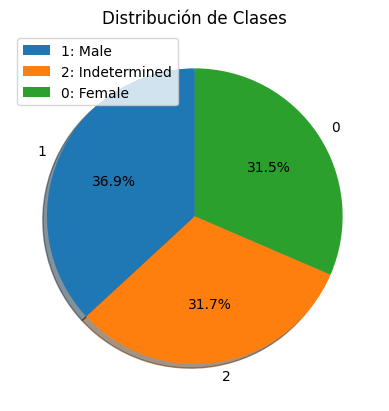

In [17]:
#Distribucion de clases de Sexo
# Calcular el conteo de valores en la columna 'income-class'
value_counts = dfCangre['Sex'].value_counts()
# Crear una figura y un eje para el gráfico de torta
fig, ax = plt.subplots()
# Configurar etiquetas y porcentajes
labels = value_counts.index
sizes = value_counts.values
explode = (0.1, 0)  # Separa el primer sector (<=50K) del resto
# Generar el gráfico de torta
ax.pie(sizes,  labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.set_title('Distribución de Clases')
plt.legend(["1: Male","2: Indetermined", "0: Female"],loc="best")
plt.show()

Variables numéricas

In [18]:
def GenerarPlotsUnivariados(df):
  '''
    Chequea si la variable es cuantitativa y genera las gráficas
    correspondientes

    Parámetros:
      df: Pandas Dataframe

  '''

  for columna in df.columns:
    fig,ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))

    # Boxplot
    sns.boxplot(data=df[columna], ax=ax[0], orient='h', width=0.4)
    ax[0].set_xlabel(columna)
    ax[0].set_title("Boxplot")

    # Histrograma
    sns.histplot(data=df[columna], ax=ax[1], kde=True)
    ax[1].set_xlabel(columna)
    ax[1].set_ylabel('Frecuencia')
    ax[1].set_title('Histograma + KDE')


    # Q-Q Plot

    sm.qqplot(
      df[columna],
      fit   = True,
      line  = 'q',
      alpha = 0.4,
      lw    = 2,
      ax    = ax[2]
    )

    ax[2].set_title("Normalidad ", fontsize = 10,
             fontweight = "bold")
    ax[2].tick_params(labelsize = 7)

    fig.suptitle('Análisis de atributo ' + columna)

    plt.tight_layout()



    print(f"Coeficientes para {columna}")
    print('Kursotis:', stats.kurtosis(df[columna]))
    print('Skewness:', stats.skew(df[columna]))
    print()


Coeficientes para Length
Kursotis: 0.0758343896249376
Skewness: -0.6508601222577257

Coeficientes para Diameter
Kursotis: -0.04215431339662956
Skewness: -0.6171649367753388

Coeficientes para Height
Kursotis: 80.14901007478775
Skewness: 3.3130680577082297

Coeficientes para Weight
Kursotis: -0.024682712654883865
Skewness: 0.5187028036185769

Coeficientes para Shucked Weight
Kursotis: 0.5771655774824911
Skewness: 0.7028435060177881

Coeficientes para Viscera Weight
Kursotis: 0.08673810247928015
Skewness: 0.5780671886343794

Coeficientes para Shell Weight
Kursotis: 0.5152729358564945
Skewness: 0.6074818892368691

Coeficientes para Age
Kursotis: 2.3310744596835287
Skewness: 1.1042846194595701

Coeficientes para BMI
Kursotis: 11.15199960263498
Skewness: 0.7448395909980376

Coeficientes para Len_dia_ratio
Kursotis: 35.579943413855844
Skewness: 1.2687176197469052



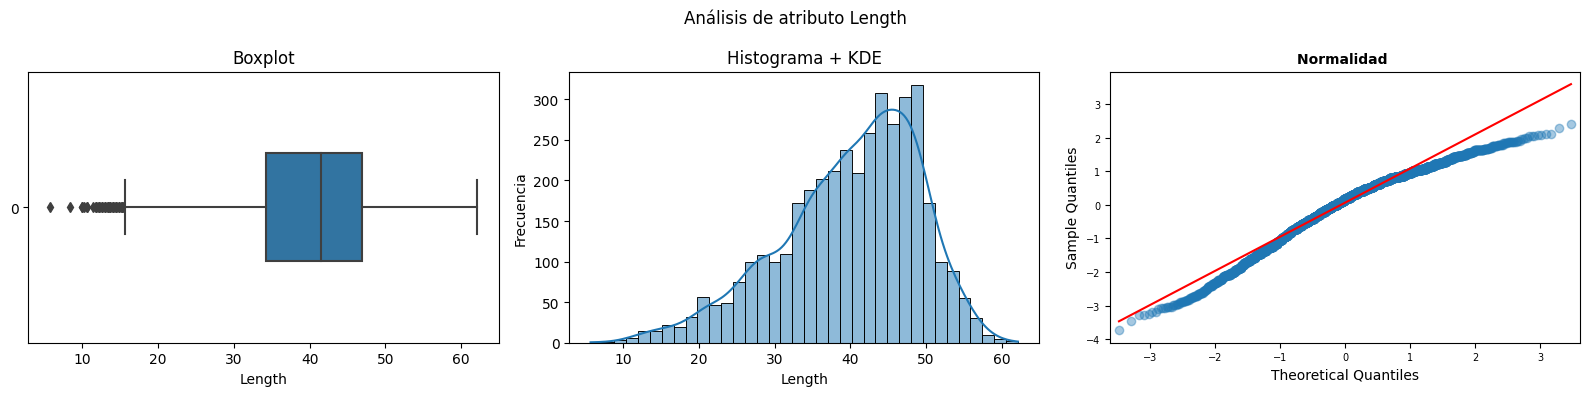

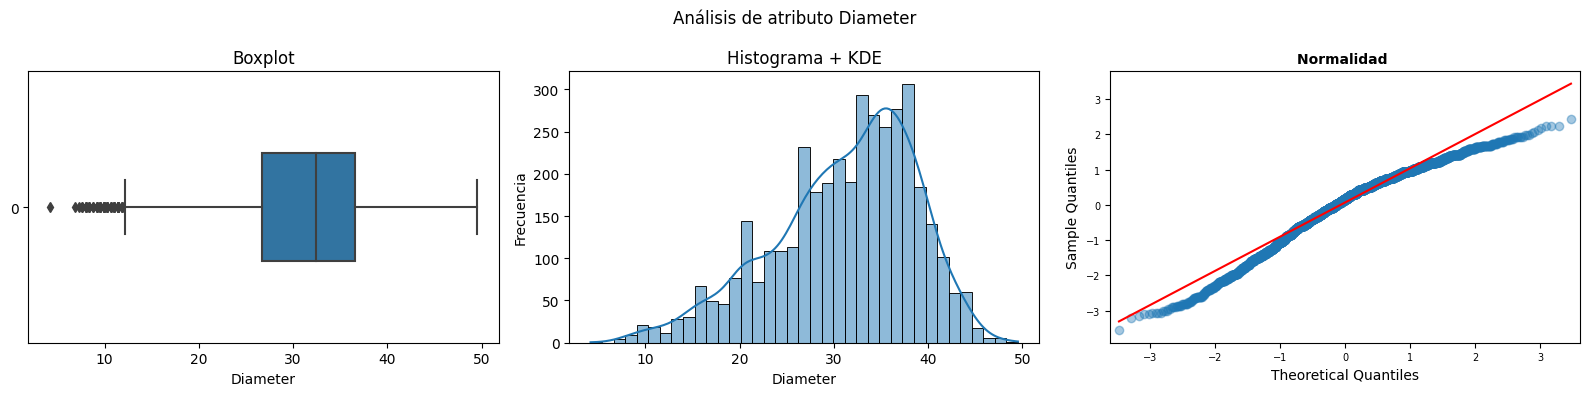

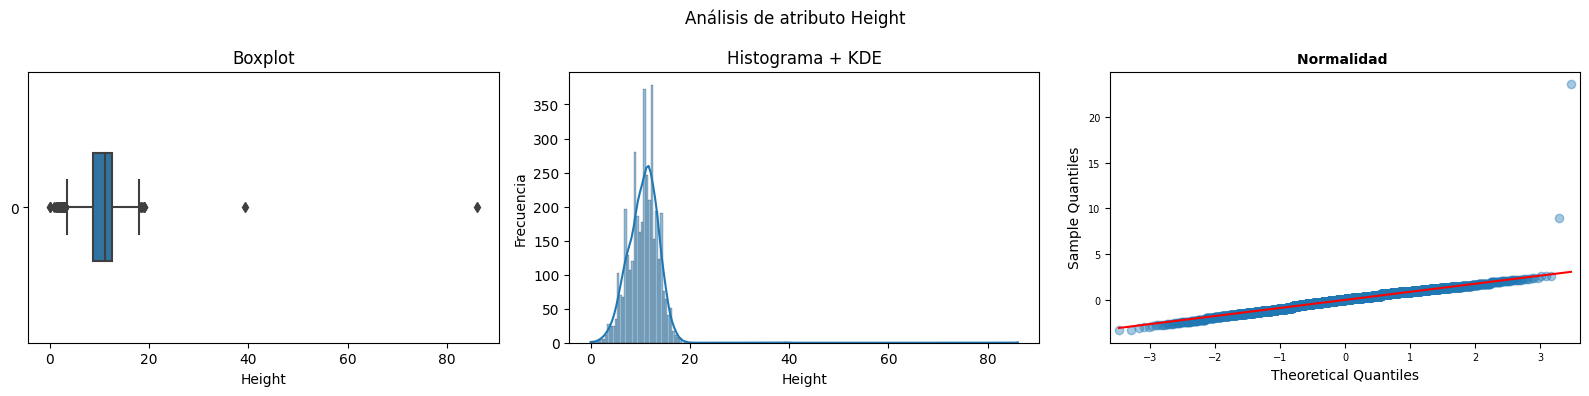

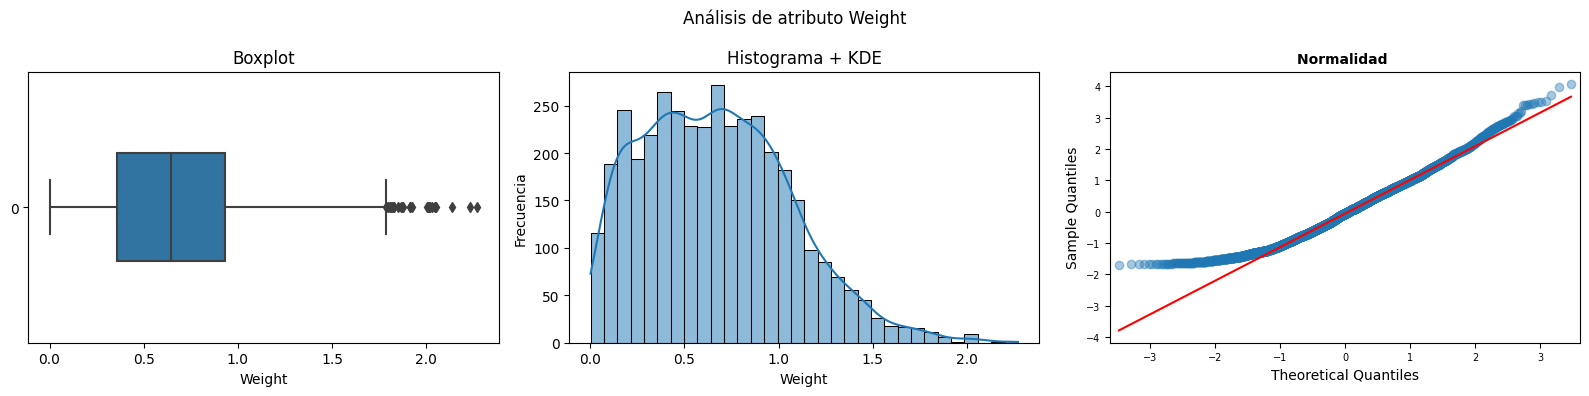

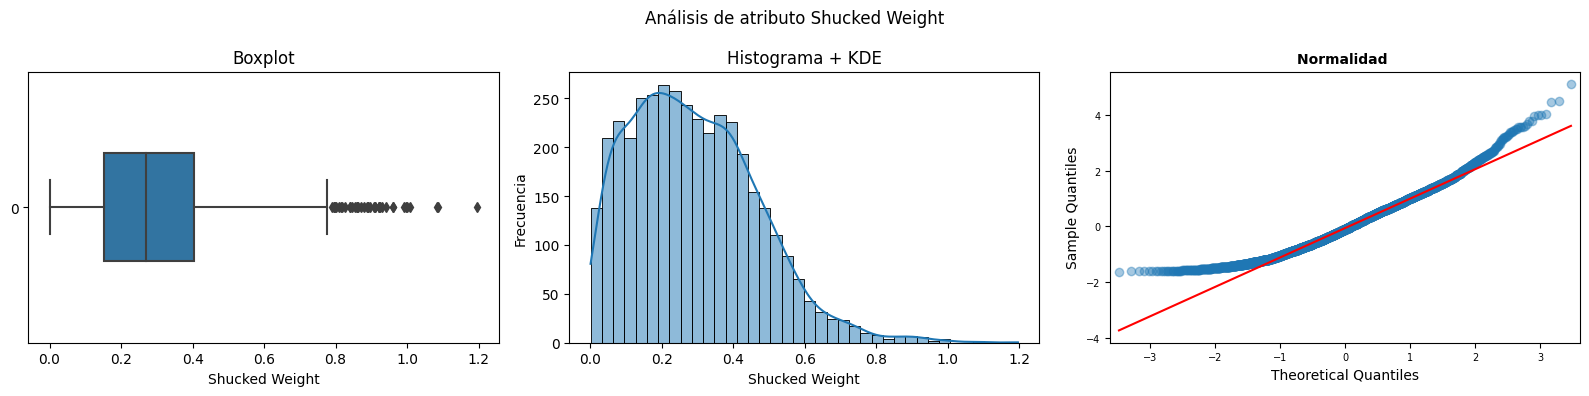

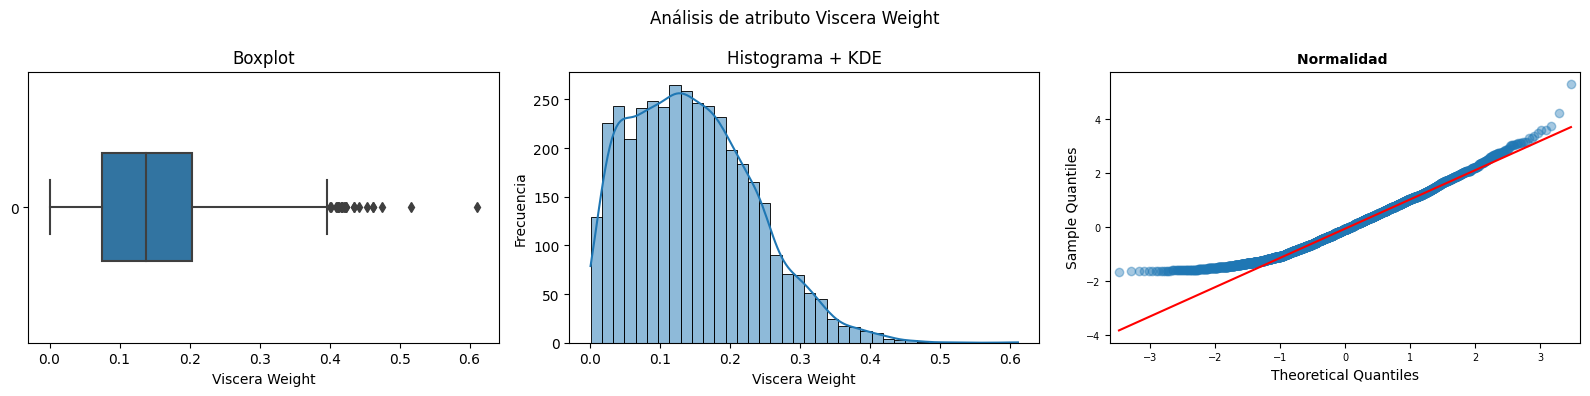

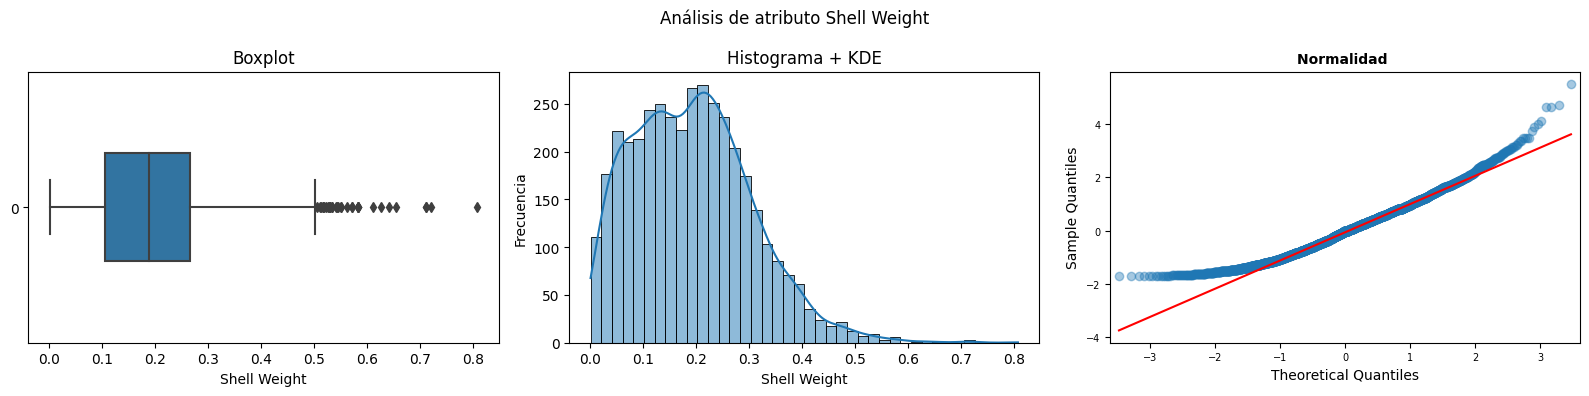

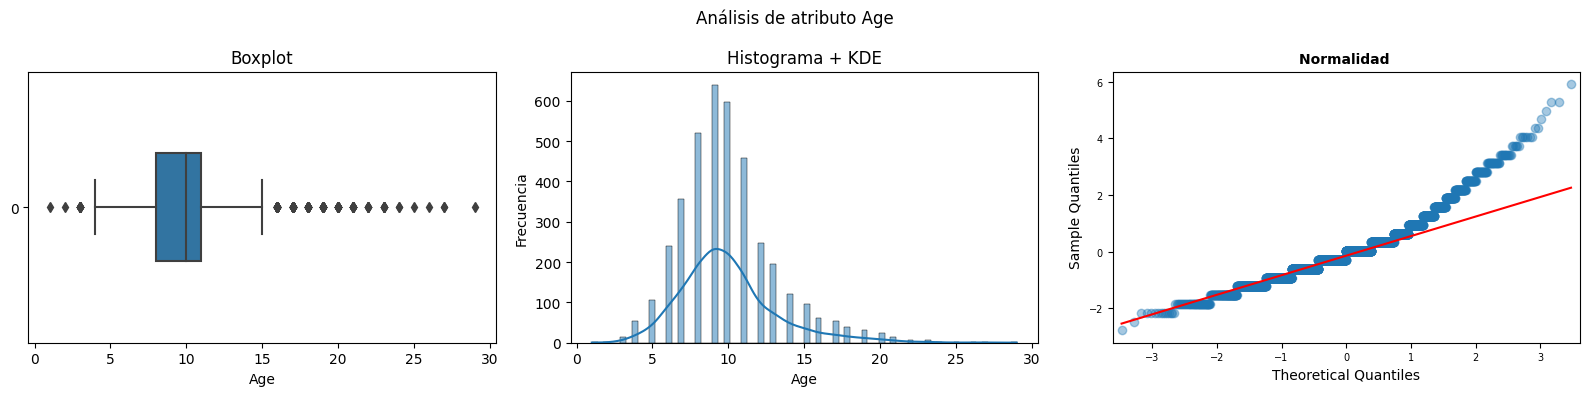

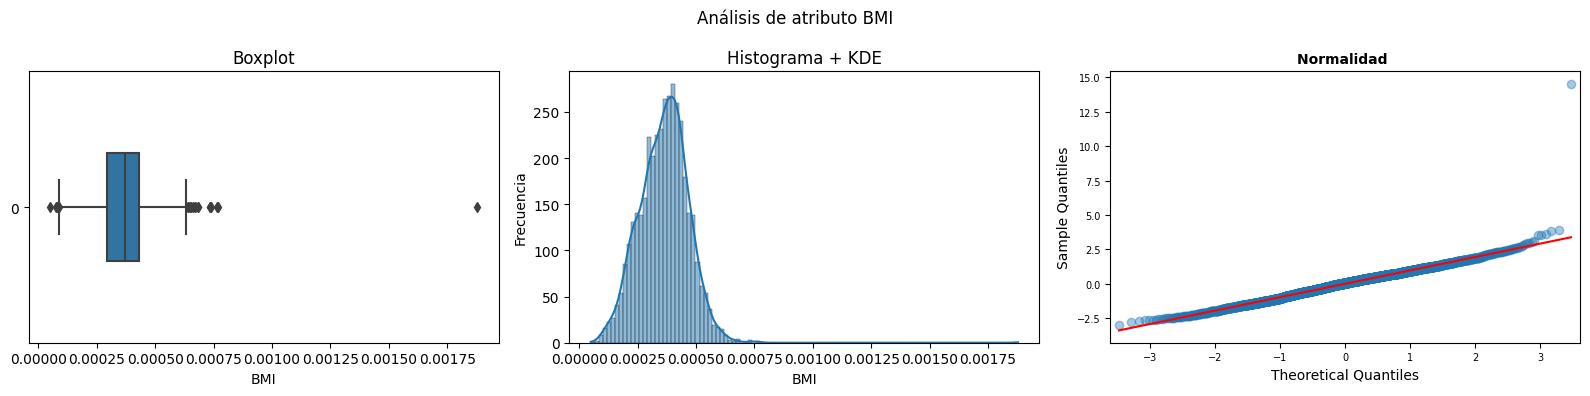

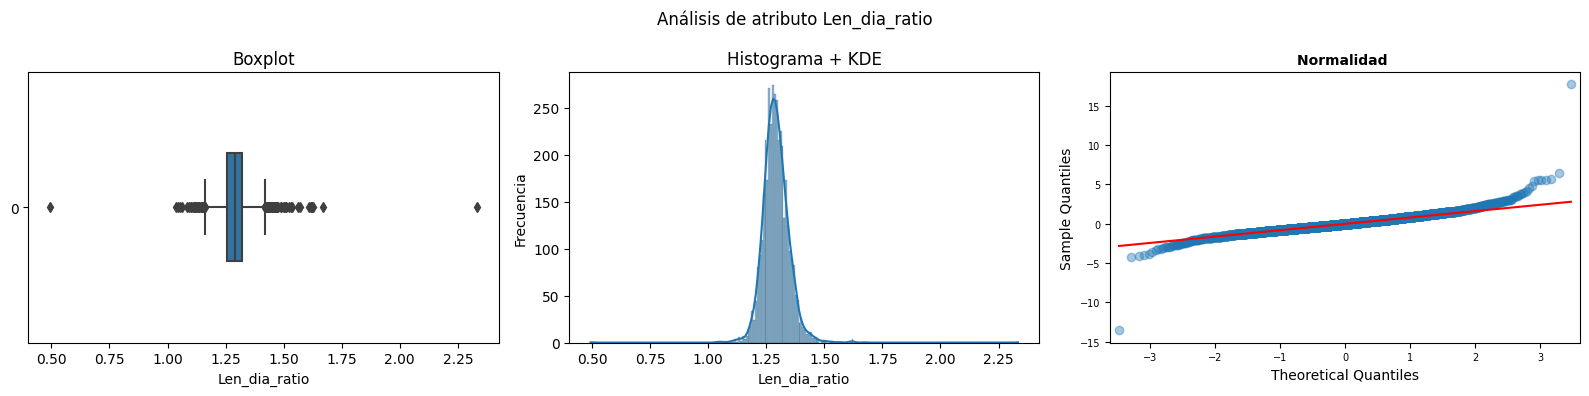

In [21]:
GenerarPlotsUnivariados(dfCangre.iloc[:,1:])

A partir de los coeficientes de curtosis y asimetría, así como de las gráficos anteriores, se verifican:
- "Height": en la inspección visual se puede ver como la gráfica es practicamente normal, pero se ve bastante afectada por los outliers que tiene.
- "Age": los outliers que tiene afectan a la distribución normal que intenta seguir la gráfica;
- Las variables "BMI" y "Len_dia_ratio" presentan distribuciones normales, aunque al ser combinaciones de otras originales, presentan valores atípicos también.
- Las demás en general presentan coeficientes de curtosis y asimetría que están en el rango de -1 y 1, y de los gráficos de Q-Q Plot se puede verificar una normalidad aceptable. También tienen valores atípicos;



In [22]:
def Outliers_IQR(df, variable, remove=False):
   """
    Función para devolver outliers usando rango intercuartil

    Arguments:
      df: Pandas Dataframe
      variable(string): nombre de la columna
      remove(boolean): True para eliminar los outliers

    Retorna:
      Pandas Dataframe
   """
   #print("Tamaño original: " ,df[variable].count())
   q1=df[variable].quantile(0.25)
   q3=df[variable].quantile(0.75)

   IQR=q3-q1

   upper = q3 + 1.5 * IQR
   lower = q1 - 1.5 * IQR


   outliers = (df[variable] < lower) | (df[variable] > upper)
   print(f"Valores atípicos para {variable}: {df[outliers][variable].count()}")
   if remove:
    df = df[~outliers]
    print("Tamaño actual: ", df[variable].count())

In [23]:
# Verificación de outliers
print(f"Cantidad total de registros: {dfCangre.shape[0]}")
print("---"*15)

for column in dfCangre.columns:

  Outliers_IQR(dfCangre,column)



Cantidad total de registros: 3893
---------------------------------------------
Valores atípicos para Sex: 0
Valores atípicos para Length: 45
Valores atípicos para Diameter: 58
Valores atípicos para Height: 42
Valores atípicos para Weight: 27
Valores atípicos para Shucked Weight: 41
Valores atípicos para Viscera Weight: 24
Valores atípicos para Shell Weight: 33
Valores atípicos para Age: 257
Valores atípicos para BMI: 19
Valores atípicos para Len_dia_ratio: 110


El número de outliers no es grande en ninguno de los casos, por lo que se decide eliminarlos para cada uno:

In [24]:
# Se realiza manualmente lo siguiente, para decidir cuales variables modificar
Outliers_IQR(dfCangre,"Length", True)
Outliers_IQR(dfCangre,"Sex", True)
Outliers_IQR(dfCangre,"Diameter", True)
Outliers_IQR(dfCangre,"Weight", True)
Outliers_IQR(dfCangre,"Shucked Weight", True)
Outliers_IQR(dfCangre,"Viscera Weight", True)
Outliers_IQR(dfCangre,"Shell Weight", True)
Outliers_IQR(dfCangre,"BMI", True)
Outliers_IQR(dfCangre,"Len_dia_ratio", True)
# De las más afectadas por los outliers:
Outliers_IQR(dfCangre,"Height", True)
Outliers_IQR(dfCangre,"Age", True)

Valores atípicos para Length: 45
Tamaño actual:  3848
Valores atípicos para Sex: 0
Tamaño actual:  3893
Valores atípicos para Diameter: 58
Tamaño actual:  3835
Valores atípicos para Weight: 27
Tamaño actual:  3866
Valores atípicos para Shucked Weight: 41
Tamaño actual:  3852
Valores atípicos para Viscera Weight: 24
Tamaño actual:  3869
Valores atípicos para Shell Weight: 33
Tamaño actual:  3860
Valores atípicos para BMI: 19
Tamaño actual:  3874
Valores atípicos para Len_dia_ratio: 110
Tamaño actual:  3783
Valores atípicos para Height: 42
Tamaño actual:  3851
Valores atípicos para Age: 257
Tamaño actual:  3636


### Análisis bivariado

Se analiza el sexo frente a las demás variables.  
Si bien la idea es hacer un modelo de regresión, con la variable objetivo "age",se quieren visualizar posibles agrupaciones en referencia al sexo de los cangrejos.

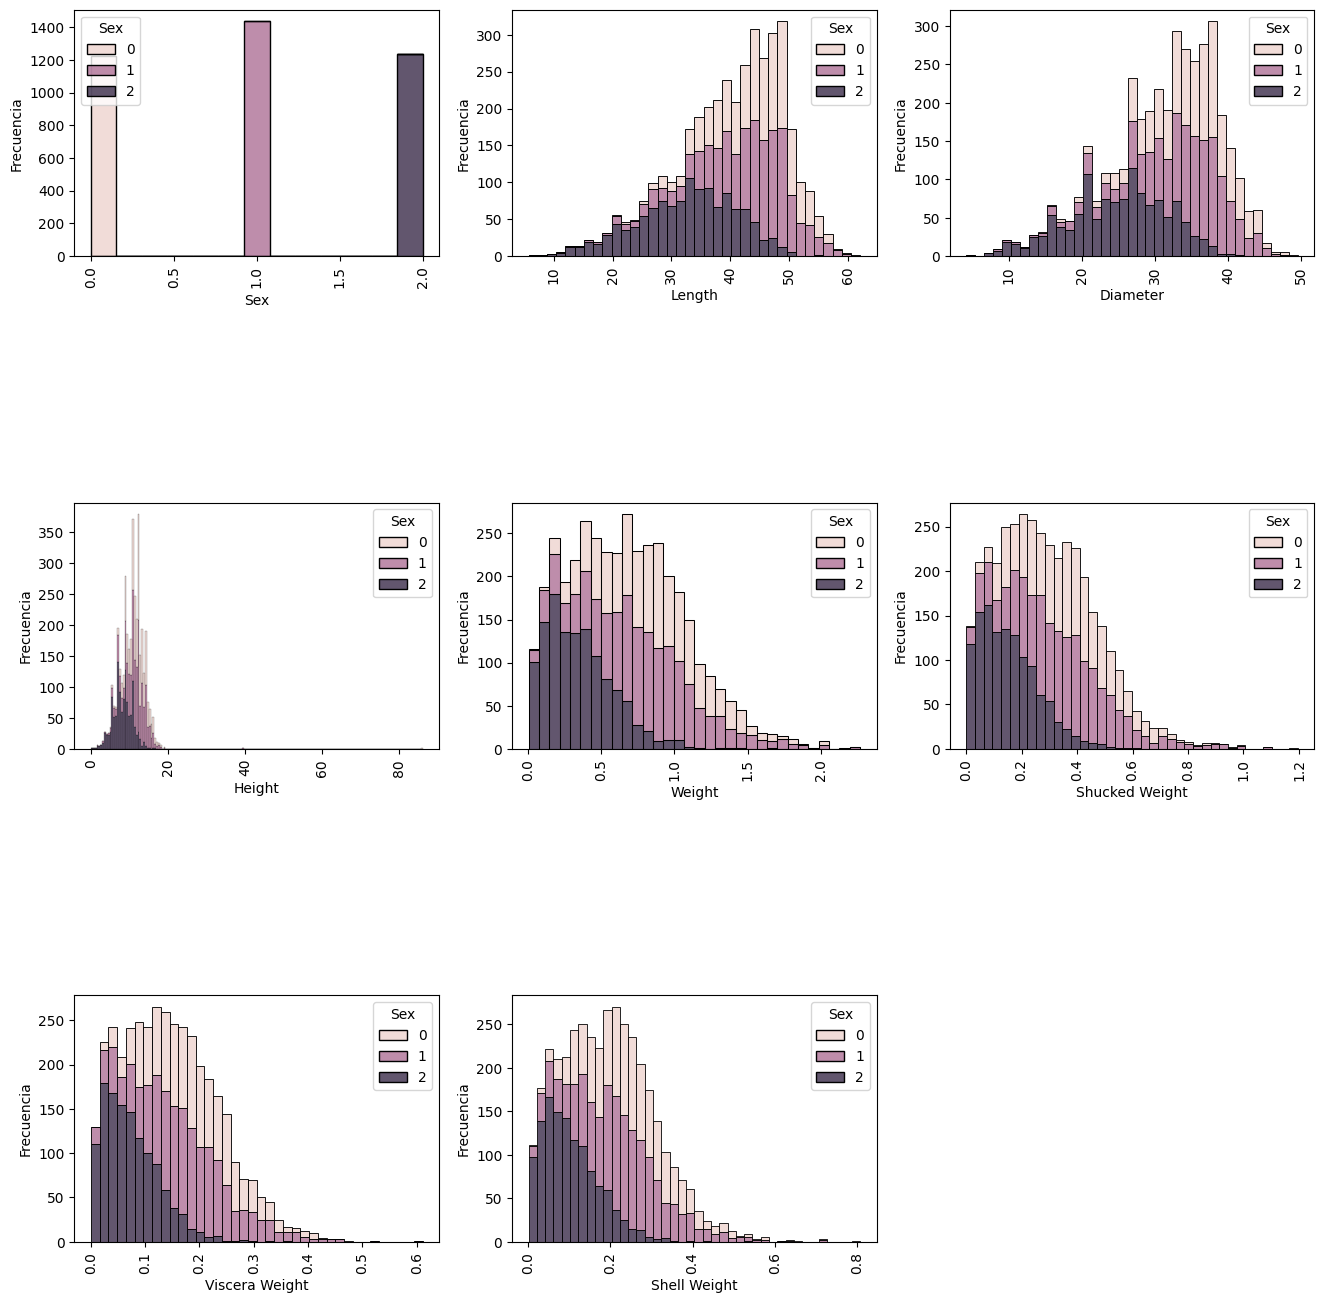

In [26]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(16, 16), sharex=False)
NombresAtributos = dfCangre.columns
plt.subplots_adjust(hspace=1.0)
for i in range(3):
    for j in range(3):
        c = i * 3 + j
        if c < 8:  # cantidad de campos a graficar
            sns.histplot(
                data=dfCangre[NombresAtributos[c]],
                x=dfCangre[NombresAtributos[c]],
                label=NombresAtributos[c],
                ax=ax[i, j],
                hue=dfCangre['Sex'],
                multiple='stack'
            )
            ax[i, j].set_xlabel(NombresAtributos[c])
            ax[i, j].set_ylabel('Frecuencia')
            ax[i, j].tick_params(axis='x', rotation=90)
        else:
            # Si no hay más campos, ocultar el gráfico
            ax[i, j].axis('off')

plt.show()

### Análisis de correlación

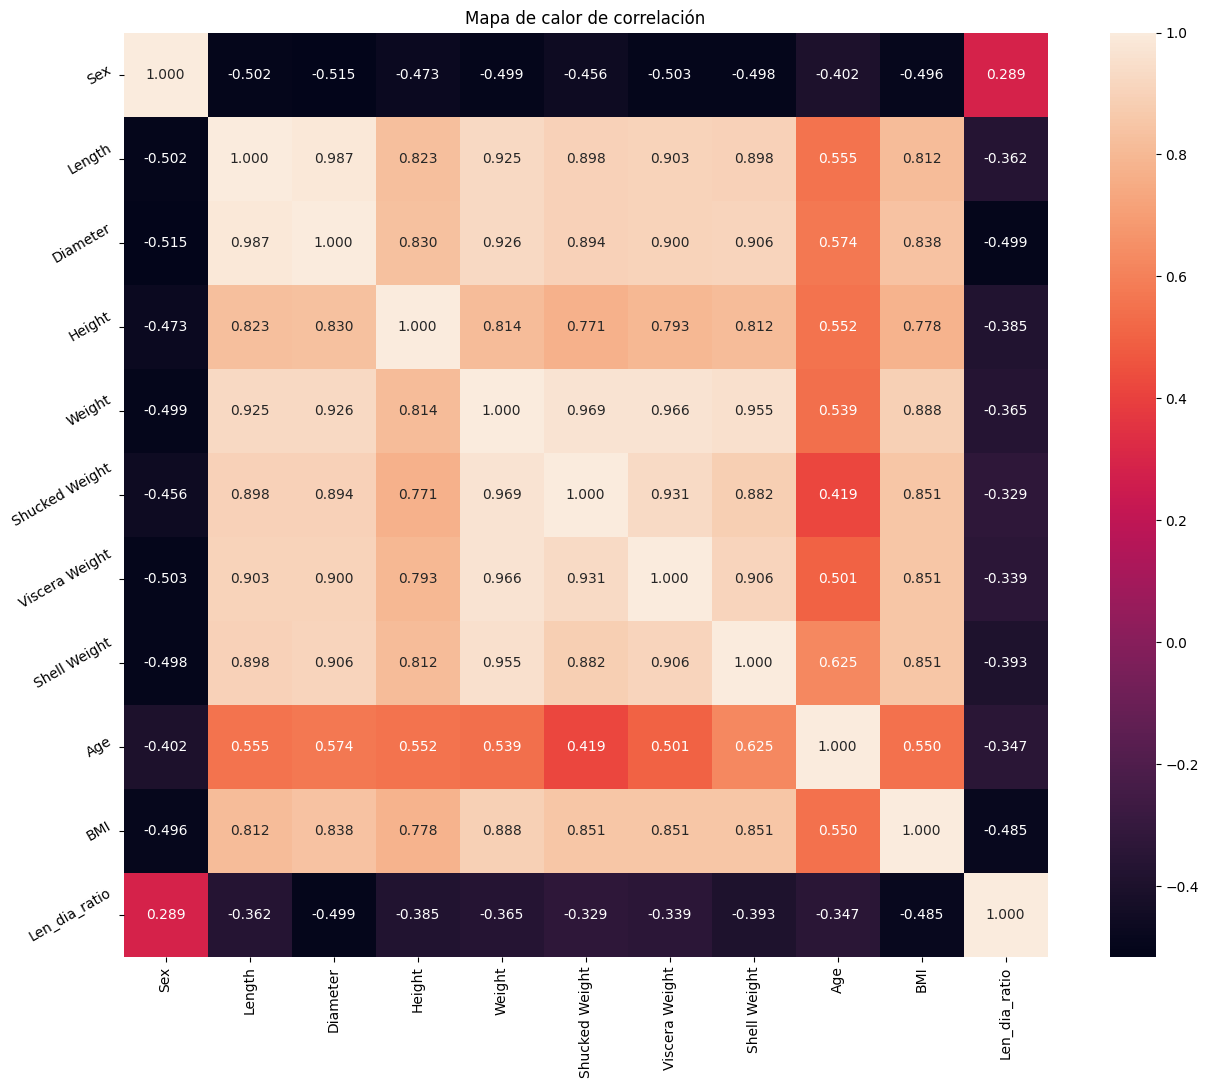

In [27]:
corr = dfCangre.corr(method='pearson')

plt.figure(figsize=(16,12))
ax = sns.heatmap(corr, annot=True, square=True, fmt='.3f', linecolor='black')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)
ax.set_title('Mapa de calor de correlación')
plt.show();


Del análisis anterior se puede notar:

- una alta correlación entre "Weight" con "Length", "Diameter", "Shucked weight", "Viscera weight" y "shell weight" (algo lógico dado que son variables que contribuyen al peso del crustáceo). De ello se podría interpretar que "Weight" puede explicar esas variables, pudiendo prescindir de ellas para el modelo;


### Análisis multivariado

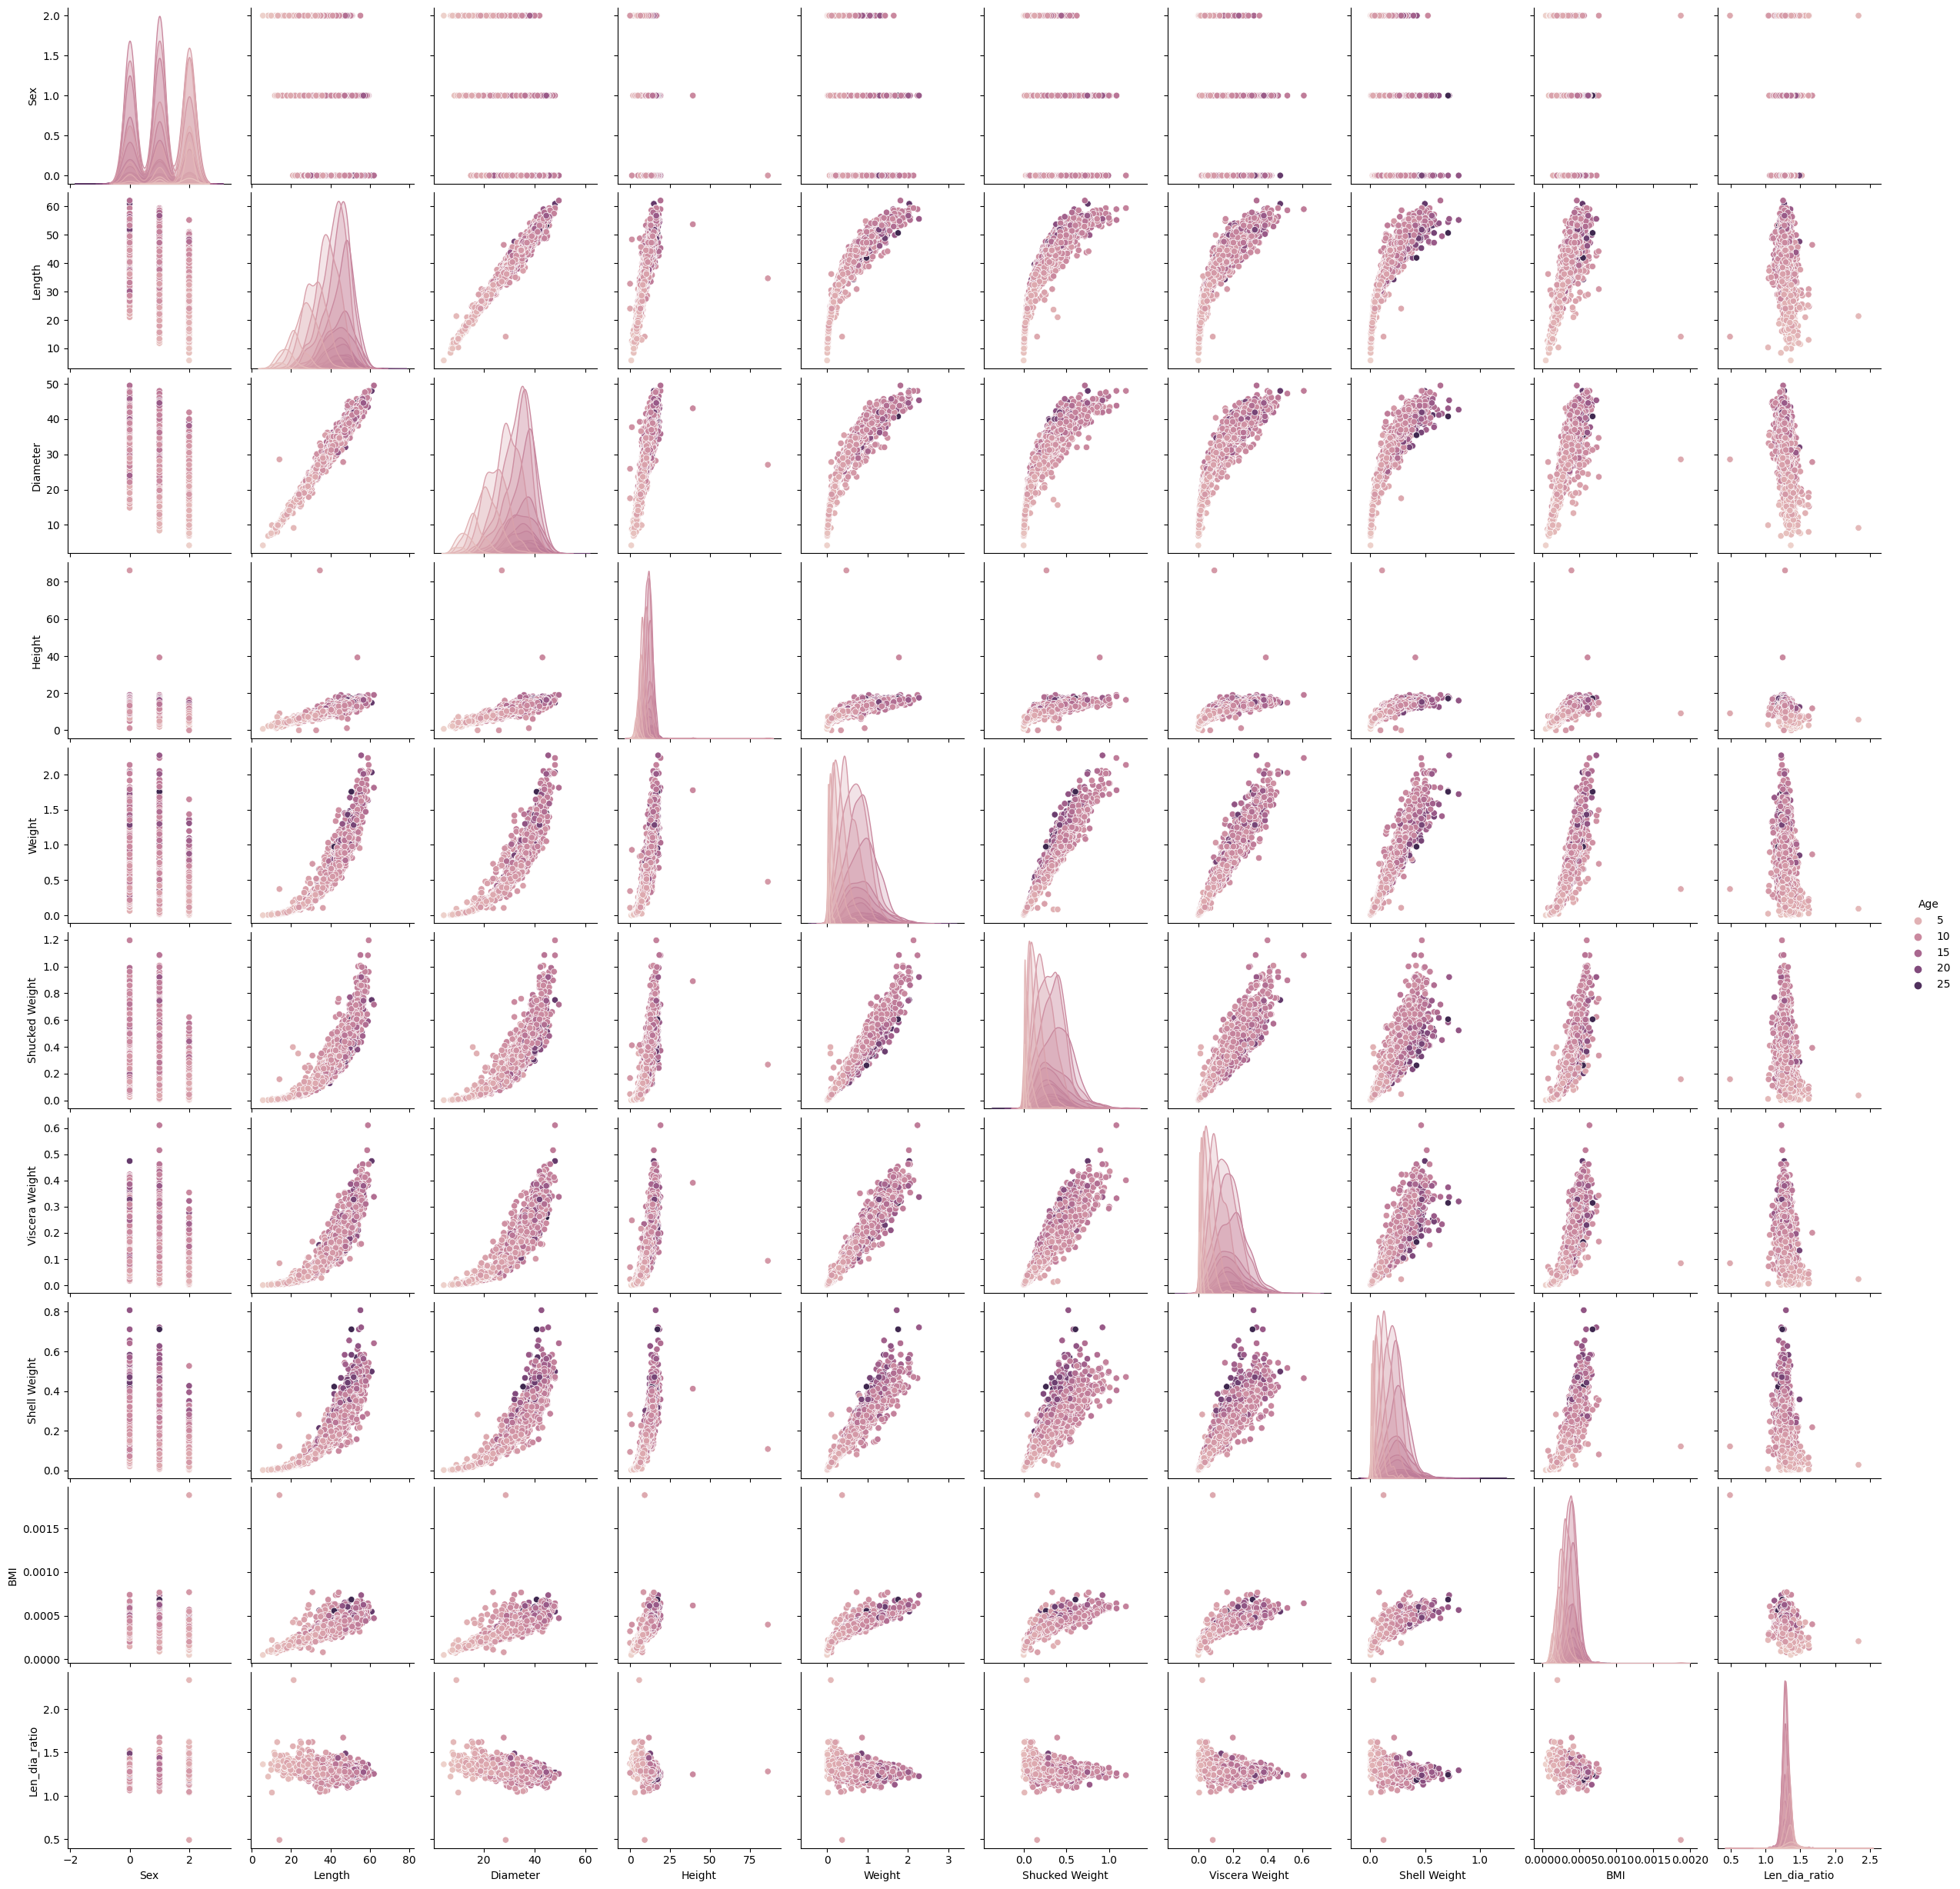

In [28]:
sns.pairplot(dfCangre, hue="Age")

## Selección de características

> Solo para especímenes vivos


In [29]:
 #X = dfCangre[['Weight', 'Length', 'Height', 'Diameter', 'Sex','BMI','Len_dia_ratio']]
#X = dfCangre[['Weight', 'Length', 'Height', 'Diameter', 'Sex',]]
X = dfCangre[['Weight', 'Height', 'Sex']]

> Todos

In [ ]:
#X = dfCangre[['Weight', 'Length', 'Height', 'Diameter','Sex','Shucked Weight','Viscera Weight', 'Shell Weight']]
#X = dfCangre[['Weight', 'Length', 'Height', 'Diameter','Sex','Shucked Weight','Viscera Weight', 'Shell Weight', 'BMI','Len_dia_ratio']]
#X = dfCangre[['Weight', 'Height', 'Sex']]
#X = dfCangre[['Weight', 'Length', 'Height', 'Diameter', 'Sex','BMI','Len_dia_ratio']]
y = dfCangre['Age']


Para tener en cuenta, no por tener más variables esto implique un mejor modelo. La inclusión de variables adicionales reduce el RMSE y aumenta el R² para los datos de entrenamiento, por lo tanto estas métricas no son del todo apropiadas para indicar que el modelo sea realmente correcto.  

#### Supuestos o condiciones

Se pretende efectuar un análisis de regresión lineal múltiple, dado que son varios los atributos que se toman como predictores.  
Antes de proseguir, se analizan los supuestos necesarios para aplicar el modelo y se realizarán pruebas para comprobar la interrelación entre variables, y asegurar la selección óptima de las mismas

> - **No colinealidad o multicolinealidad**: del mapa de calor antes generado, se puede ver que algunas variables, tal como el caso de "Weight", tienen alta correlación con otras.

> - **Distribución normal de la variable respuesta**: esto se cumple para la variable "age", y más aún luego de quitar los outliers

> - **Presencia de outliers**: la limpieza de los mismos ya fue realizada

> - **Homocedasticidad**: hacer un test de residuos del modelo frente a cada predictor

Probar métodos _forward selection_ y _backward selection_

## Particionado de datos

In [ ]:
# Divide en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Entrenamiento del modelo

### Regresión lineal múltiple

> No colinealidad o multicolinealidad
Generar modelo de regresión lineal simple

In [ ]:
# genera el modelo de regresión
lr_model = LinearRegression()

# entrena el modelo
lr_model.fit(X_train, y_train)

# realiza las predicciones sobre test
y_pred = lr_model.predict(X_test)


In [ ]:
lr_model.intercept_

7.839055193081558

In [ ]:
lr_model.coef_

array([ 6.94475382e+00,  1.43966609e-01,  1.01711523e-01, -4.66179880e-02,
       -3.55543899e-01, -2.17239008e+01, -9.35447618e+00,  1.58457375e+01,
        4.86723620e+03, -3.67254106e+00])

In [ ]:
# performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)
print(f'R-squared:{r2}')
print(f"Root Mean Squared Error: {rmse}")
print(f'Mean squared error: {mse}')

R-squared:0.541724641618208
Root Mean Squared Error: 2.1365886582599987
Mean squared error: 4.565011094605261
